# Pymaceuticals Inc.
---

### Analysis

- "In this study, 249 mice who were identified with SCC tumors received treatment with a range of drug regimens. Over the course of 45 days, tumor development was observed and measured. The purpose of this study was to compare the performance of Pymaceuticals’ drug of interest, Capomulin, against the other treatment regimens."
After analyzing and cleaning the data provided, it can be noted that Capomulin and Ramicane were the most popularly used drug regimen, with Ramicane being slightly more successful in minimizing the size of the tumors. From the line and scatter plot created to focus on the Capomulin regimen, we see that the volume of the tumor increases as the weight of the mouse increases with the treatment. However, it should also be stated that after a 40 day time period, the volume of the tumor rapidly decreases around the 25-35 day mark, only to pick back up again around day 36.
 

In [44]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combine_data_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
combine_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [45]:
# Checking the number of mice.
combine_data_df["Mouse ID"].nunique()

249

In [46]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated = combine_data_df[combine_data_df.duplicated(["Mouse ID", "Timepoint"])]
duplicated["Mouse ID"].unique()

array(['g989'], dtype=object)

In [47]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data_df = combine_data_df.loc[combine_data_df["Mouse ID"]== "g989", :]
duplicate_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [48]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combine_data_df.drop(combine_data_df[combine_data_df["Mouse ID"]== "g989"].index)
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [49]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

248

## Summary Statistics

In [50]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_volume_mean = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tumor_volume_median = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_volume_variance = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_volume_std = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_volume_SEM = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary DataFrame.
tumor_volume_summary = pd.DataFrame({"Mean Tumor Volume": tumor_volume_mean,
                                    "Median Tumor Volume": tumor_volume_median,
                                    "Variance Tumor Volume": tumor_volume_variance,
                                    "Standard Deviation Tumor Volume": tumor_volume_std,
                                    "SEM Tumor Volume":tumor_volume_SEM})
tumor_volume_summary

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [51]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
data_aggregation_df = clean_df.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].agg(['mean','median','var','std','sem'])
data_aggregation_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: title={'center': 'Quantity of Mice for Each Drug Regimen'}, xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

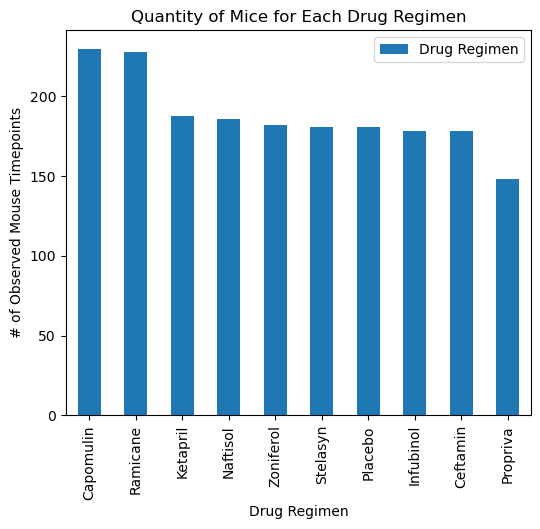

In [102]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drugmice_barplot= pd.DataFrame(clean_df["Drug Regimen"].value_counts())
drugmice_barplot

drugmice_barplot.plot(kind="bar", title= "Quantity of Mice for Each Drug Regimen", xlabel="Drug Regimen", ylabel= "# of Observed Mouse Timepoints", figsize=(6,5))

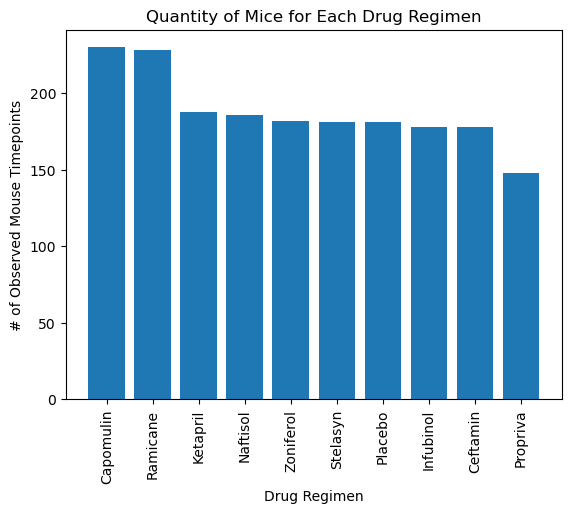

In [101]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
import numpy as np

x_axis = np.arange(len(drugmice_barplot))
ticks = [value for value in x_axis]
plt.bar(x_axis, drugmice_barplot["Drug Regimen"], align="center")
plt.xticks(ticks, drugmice_barplot.index, rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Quantity of Mice for Each Drug Regimen")
plt.show()

array([<Axes: ylabel='Sex'>], dtype=object)

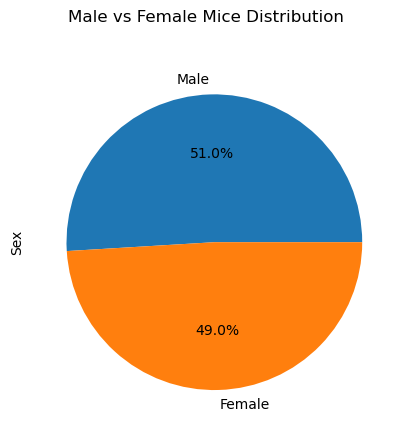

In [99]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
import pandas as pd 
sex_of_mice = pd.DataFrame(clean_df["Sex"].value_counts())

sex_of_mice.plot(kind="pie", title=("Male vs Female Mice Distribution"), subplots=True, use_index=True, ylabel=("Sex"), autopct="%1.1f%%", legend=None)

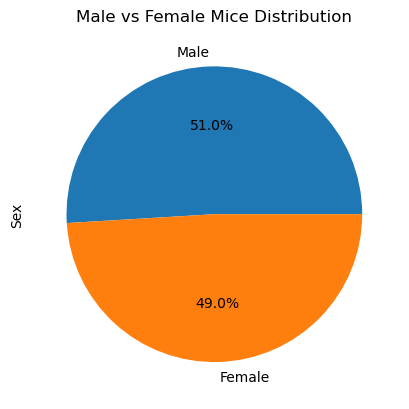

In [98]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sexes = list(clean_df["Sex"].unique())
sexes.sort(reverse=True)

plt.pie(sex_of_mice["Sex"], labels=sexes, autopct="%1.1f%%", startangle=0)
plt.ylabel("Sex")
plt.title("Male vs Female Mice Distribution")
plt.show()

# Generate a pie plot showing the distribution of female versus male mice using pyplot


In [56]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_volume=clean_df.groupby("Mouse ID")
final_volume = pd.DataFrame(final_volume["Timepoint"].max())
final_volume

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_volume_merge = pd.merge(final_volume, clean_df, on=(["Mouse ID","Timepoint"]))
final_volume_merge

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [65]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments: 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    #loc for each time drug is counted and tumor volumes that correlate
    tumorvolume = final_volume_merge.loc[final_volume_merge["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_volume_data.append(tumorvolume)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumorvolume.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq 
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    

    
    
#print outlier results
    print(f"For {treatment} values below {lower_bound} and above {upper_bound} are outliers.")

For Capomulin values below 20.70456164999999 and above 51.83201549 are outliers.
For Ramicane values below 17.912664470000003 and above 54.30681135 are outliers.
For Infubinol values below 36.83290494999999 and above 82.74144559000001 are outliers.
For Ceftamin values below 25.355449580000002 and above 87.66645829999999 are outliers.


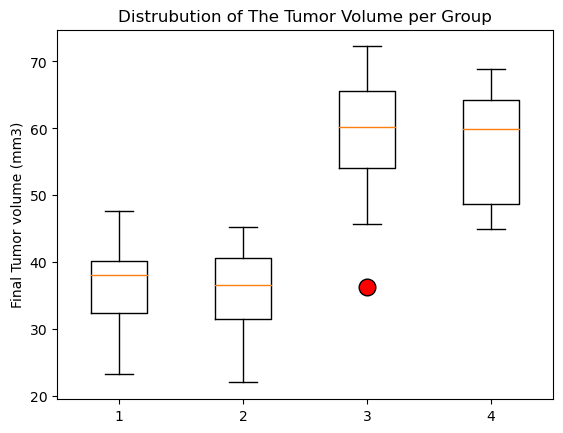

In [95]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
data = tumor_volume_data
fig, axs = plt.subplots()
axs.boxplot(data,flierprops={"marker": "o", "markersize": 12, "markerfacecolor": "red", "markeredgecolor": "black"})
axs.set_ylabel('Final Tumor volume (mm3)')
axs.set_title('Distrubution of The Tumor Volume per Group')
plt.show()

## Line and Scatter Plots

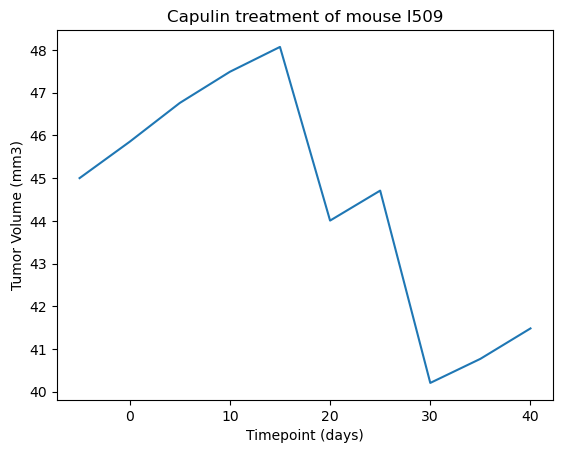

In [85]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse1509_data = clean_df.loc[clean_df["Mouse ID"] == "l509", ["Timepoint", "Tumor Volume (mm3)"]]

x_axis = np.arange(0, mouse1509_data["Timepoint"].count())
tick= []
for x in x_axis:
    if x % 2 == 1:
        tick.append(x)

tick_labels = list(mouse1509_data.loc[mouse1509_data["Timepoint"] % 10 == 0, "Timepoint"].unique())

mouse_1509, = plt.plot(x_axis, mouse1509_data["Tumor Volume (mm3)"])

plt.title("Capulin treatment of mouse I509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.xticks(tick,tick_labels)

plt.show()

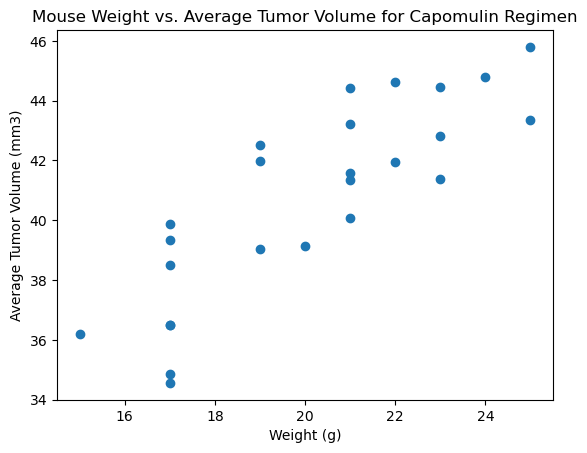

In [92]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
mouse_weight = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")["Weight (g)"].mean()
tumor_volume_avg = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
plt.scatter(mouse_weight, tumor_volume_avg)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is  0.84 


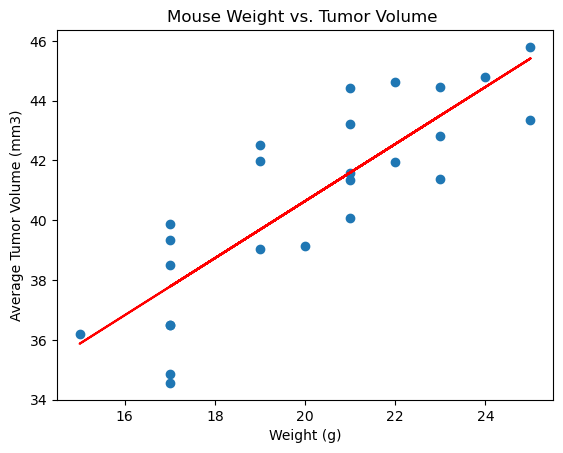

In [93]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
mouse_weight = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")["Weight (g)"].mean()
tumor_volume_avg = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

plt.scatter(mouse_weight, tumor_volume_avg)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

(slope, y_intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, tumor_volume_avg)
regress_values = mouse_weight * slope + y_intercept
plt.plot(mouse_weight, regress_values, "r-")
plt.title("Mouse Weight vs. Tumor Volume ")

print(f"The correlation between mouse weight and the average tumor volume is  {round(rvalue,2)} ")
plt.show()